##### 학습목표
    1.임베딩에 대해 이해하고 얼굴의 임베딩 벡터를 추출합니다.  
    2.얼굴의 임베딩 벡터로 닮은 꼴인 얼굴을 찾습니다.  
    3.나와 가까운 연예인을 찾아냅니다.  

##### 루브릭
    1. 얼굴임베딩 벡터를 활용해 가장 닮은 연예인 Best 5를 구할 수 있다.
        - 닮은꼴 순위, 이름, 임베딩 거리를 포함한 Top-5 리스트가 정렬되어 출력되었다.
    2. 충분한 수의 이미지에 대한 시도를 통해 매우 닮은꼴의 연예인을 찾아냈다.
        - 다양한 탐색을 통해 본인과 임베딩 거리 0.5 이내로 닮은 연예인을 찾아냈다.
    3. 다양하고 재미있는 결과 시각화를 시도하였다.
        - matplotlib 등 다양한 시각화 도구를 하나 이상 이용해 재미있는 결과 시각화를 구현하였다.

### 라이브러리 불러오기

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as img
import face_recognition
%matplotlib inline
import numpy as np
from PIL import Image  

### 사진 모으기

file_list: ['escups.jpg', 'jangwuonyeong.jpg', 'kimsuhyeon.jpg', 'hyeri.jpg', 'jungjiyoung.jpg', 'iseo.jpg', 'irin.jpg', 'minji.jpg', 'yoojeseok.jpg', 'parkminyoung.jpg', 'mcgri.jpg', 'yooyeonseok.jpg', 'choigangchangmin.jpg', 'limsiwan.jpg', 'jin.jpg', 'chaeunwoo.jpg', 'kimdoyeon.jpg', 'hyojung.jpg', 'jungjiyeong.jpg', 'jungkook.jpg', 'leebyeongheon.jpg', 'v.jpg']


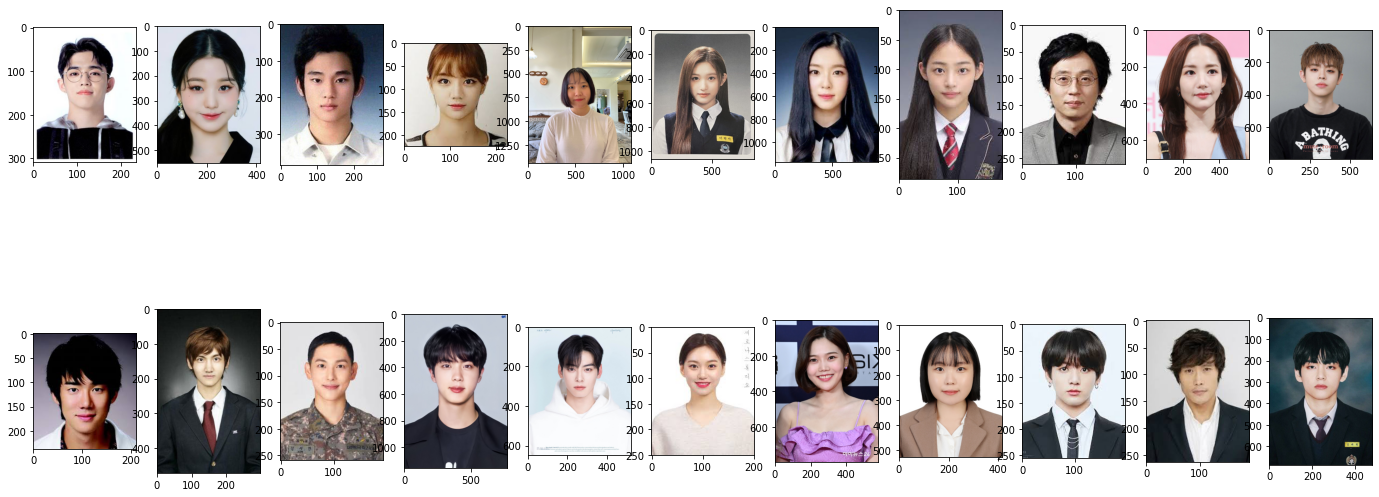

In [2]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/jpg'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

#Set figsize here
fig, axes = plt.subplots(nrows=2, ncols=11, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
    image = img.imread(dir_path+'/'+file_list[i])
    ax.imshow(image)
plt.show()

fig.tight_layout()

### 얼굴 영역 자르기

#### 내 사진으로는 증명사진과 친구가 찍어준 사진으로 비교해보기로 했다.

[(139, 304, 325, 118)]


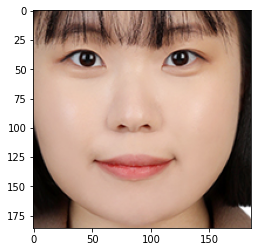

In [3]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/jpg/jungjiyeong.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

In [4]:
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

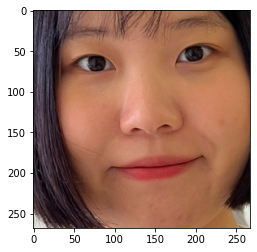

In [5]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/jpg/jungjiyoung.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

In [6]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/jpg'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['escups.jpg', 'jangwuonyeong.jpg', 'kimsuhyeon.jpg', 'hyeri.jpg', 'jungjiyoung.jpg', 'iseo.jpg', 'irin.jpg', 'minji.jpg', 'yoojeseok.jpg', 'parkminyoung.jpg', 'mcgri.jpg', 'yooyeonseok.jpg', 'choigangchangmin.jpg', 'limsiwan.jpg', 'jin.jpg', 'chaeunwoo.jpg', 'kimdoyeon.jpg', 'hyojung.jpg', 'jungjiyeong.jpg', 'jungkook.jpg', 'leebyeongheon.jpg', 'v.jpg']


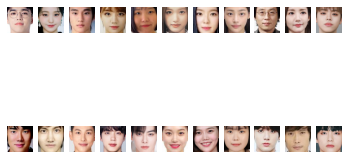

In [7]:
for i in range(len(file_list)):
    path_to_save = os.getenv('HOME')+'/aiffel/face_embedding/cropped/'+file_list[i]
    image_path = os.getenv('HOME')+'/aiffel/face_embedding/jpg/'+file_list[i]
    face = get_cropped_face(image_path)
    pillow_image = Image.fromarray(face)
    pillow_image.save(path_to_save)
    plt.subplot(2,11,i+1)
    plt.axis('off')
    plt.imshow(face)

#### 얼굴을 잘 인식하고 있는 것을 확인했다.

    plt.subplot
        https://webnautes.tistory.com/1734

    축 제거 
        https://foss4g.tistory.com/1263

### 얼굴 영역의 임베딩 추출하기

In [8]:
image_file = os.path.join(dir_path, 'jungjiyeong.jpg')
face = get_cropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.05787526,  0.05338384,  0.04618064, -0.12553929, -0.08793192,
        -0.03264268, -0.07655729, -0.06918031,  0.14210789, -0.1495374 ,
         0.21882173, -0.10679732, -0.26079029, -0.03691148, -0.11571065,
         0.21626562, -0.14918333, -0.13854285, -0.06815341,  0.01103443,
         0.09777741,  0.03393971, -0.0208621 ,  0.03652478, -0.10256454,
        -0.34562272, -0.10705921, -0.01894207, -0.06788912, -0.05827544,
        -0.06943497,  0.0434003 , -0.2077969 , -0.00691322,  0.03504342,
         0.12460676, -0.03917439, -0.13095278,  0.1131857 ,  0.01921727,
        -0.26594412,  0.04616909,  0.0379332 ,  0.24186787,  0.16587009,
         0.00228832,  0.02898395, -0.14969397,  0.10859191, -0.19990325,
        -0.00409893,  0.15653265,  0.06276836,  0.01755394,  0.02446323,
        -0.08738687,  0.04380983,  0.14173838, -0.11050586, -0.02824521,
         0.12485718, -0.07726569, -0.04512936, -0.15466893,  0.21680568,
         0.06558189, -0.16716398, -0.20262109,  0.1

In [9]:
image_file = os.path.join(dir_path, 'jungjiyoung.jpg')
face = get_cropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

embedding = get_face_embedding(face)  
embedding

[array([-0.09701956,  0.12033647,  0.02282367, -0.08896623, -0.16306318,
        -0.04390545, -0.05151513, -0.10219847,  0.13423498, -0.14314373,
         0.23454085, -0.13112171, -0.26009649, -0.07937308, -0.02430373,
         0.256879  , -0.17057371, -0.15580112, -0.03747372,  0.03110856,
         0.11561026, -0.04551778, -0.00108241,  0.08990018, -0.1106641 ,
        -0.33840695, -0.08545084, -0.05184949, -0.05701153, -0.1104989 ,
        -0.0428319 ,  0.03747287, -0.19991668, -0.04335533,  0.02666373,
         0.0925174 , -0.03757296, -0.10859961,  0.17548397, -0.04875319,
        -0.31578994,  0.03216421,  0.09460466,  0.20709667,  0.14360432,
        -0.00563932,  0.02481209, -0.14057113,  0.13427134, -0.19320403,
         0.04054303,  0.15726939,  0.03902727,  0.03512611,  0.02040016,
        -0.12232776,  0.03414445,  0.14567874, -0.13906083, -0.01623197,
         0.15654941, -0.03705832, -0.04160628, -0.14395136,  0.20695949,
         0.1026568 , -0.14869738, -0.19992934,  0.0

In [10]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
        # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
        # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

In [11]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['jungjiyoung']

array([-0.09701956,  0.12033647,  0.02282367, -0.08896623, -0.16306318,
       -0.04390545, -0.05151513, -0.10219847,  0.13423498, -0.14314373,
        0.23454085, -0.13112171, -0.26009649, -0.07937308, -0.02430373,
        0.256879  , -0.17057371, -0.15580112, -0.03747372,  0.03110856,
        0.11561026, -0.04551778, -0.00108241,  0.08990018, -0.1106641 ,
       -0.33840695, -0.08545084, -0.05184949, -0.05701153, -0.1104989 ,
       -0.0428319 ,  0.03747287, -0.19991668, -0.04335533,  0.02666373,
        0.0925174 , -0.03757296, -0.10859961,  0.17548397, -0.04875319,
       -0.31578994,  0.03216421,  0.09460466,  0.20709667,  0.14360432,
       -0.00563932,  0.02481209, -0.14057113,  0.13427134, -0.19320403,
        0.04054303,  0.15726939,  0.03902727,  0.03512611,  0.02040016,
       -0.12232776,  0.03414445,  0.14567874, -0.13906083, -0.01623197,
        0.15654941, -0.03705832, -0.04160628, -0.14395136,  0.20695949,
        0.1026568 , -0.14869738, -0.19992934,  0.08854287, -0.13

In [12]:
# jungjiyeong / 증명사진
A = np.array([-0.05787526,  0.05338384,  0.04618064, -0.12553929, -0.08793192,
        -0.03264268, -0.07655729, -0.06918031,  0.14210789, -0.1495374 ,
         0.21882173, -0.10679732, -0.26079029, -0.03691148, -0.11571065,
         0.21626562, -0.14918333, -0.13854285, -0.06815341,  0.01103443,
         0.09777741,  0.03393971, -0.0208621 ,  0.03652478, -0.10256454,
        -0.34562272, -0.10705921, -0.01894207, -0.06788912, -0.05827544,
        -0.06943497,  0.0434003 , -0.2077969 , -0.00691322,  0.03504342,
         0.12460676, -0.03917439, -0.13095278,  0.1131857 ,  0.01921727,
        -0.26594412,  0.04616909,  0.0379332 ,  0.24186787,  0.16587009,
         0.00228832,  0.02898395, -0.14969397,  0.10859191, -0.19990325,
        -0.00409893,  0.15653265,  0.06276836,  0.01755394,  0.02446323,
        -0.08738687,  0.04380983,  0.14173838, -0.11050586, -0.02824521,
         0.12485718, -0.07726569, -0.04512936, -0.15466893,  0.21680568,
         0.06558189, -0.16716398, -0.20262109,  0.14386952, -0.14542696,
        -0.0511127 ,  0.06407703, -0.15745556, -0.21036637, -0.26772583,
         0.02775344,  0.33407331,  0.11836877, -0.17202564,  0.10030355,
        -0.03137505,  0.0710118 ,  0.13354647,  0.16476934,  0.02319561,
         0.09919152, -0.11928272,  0.04028896,  0.27214193, -0.11893675,
        -0.01908277,  0.21290383, -0.03344075,  0.0521819 ,  0.01354924,
        -0.01259051, -0.06364293,  0.03911958, -0.14235666,  0.06775454,
         0.0537791 , -0.0253369 , -0.06862358,  0.08741412, -0.07119372,
         0.08446763, -0.03609438,  0.01520949, -0.00301521, -0.06962717,
        -0.12755613, -0.06392017,  0.12202305, -0.22617576,  0.17405768,
         0.14301562,  0.09118716,  0.07589827,  0.1671789 ,  0.06955322,
         0.01450381, -0.0406621 , -0.25028488, -0.04106428,  0.12617362,
        -0.03106663,  0.09395961, -0.05053677])

# jungjiyoung / 친구가 찍어준 사진
B = np.array([-0.09701956,  0.12033647,  0.02282367, -0.08896623, -0.16306318,
        -0.04390545, -0.05151513, -0.10219847,  0.13423498, -0.14314373,
         0.23454085, -0.13112171, -0.26009649, -0.07937308, -0.02430373,
         0.256879  , -0.17057371, -0.15580112, -0.03747372,  0.03110856,
         0.11561026, -0.04551778, -0.00108241,  0.08990018, -0.1106641 ,
        -0.33840695, -0.08545084, -0.05184949, -0.05701153, -0.1104989 ,
        -0.0428319 ,  0.03747287, -0.19991668, -0.04335533,  0.02666373,
         0.0925174 , -0.03757296, -0.10859961,  0.17548397, -0.04875319,
        -0.31578994,  0.03216421,  0.09460466,  0.20709667,  0.14360432,
        -0.00563932,  0.02481209, -0.14057113,  0.13427134, -0.19320403,
         0.04054303,  0.15726939,  0.03902727,  0.03512611,  0.02040016,
        -0.12232776,  0.03414445,  0.14567874, -0.13906083, -0.01623197,
         0.15654941, -0.03705832, -0.04160628, -0.14395136,  0.20695949,
         0.1026568 , -0.14869738, -0.19992934,  0.08854287, -0.13732772,
        -0.07815355,  0.07645686, -0.1870511 , -0.20849873, -0.31775808,
        -0.00982178,  0.36677212,  0.10653374, -0.16879784,  0.04143056,
        -0.01379891,  0.02244332,  0.12730895,  0.18540263,  0.05628027,
         0.03424158, -0.07650103,  0.05628579,  0.23013504, -0.0978721 ,
        -0.01241996,  0.22442448, -0.00124587,  0.06099664, -0.02930328,
         0.01869542, -0.04990389,  0.01982259, -0.12905061,  0.04700184,
        -0.00585527, -0.02570512, -0.06568615,  0.09637115, -0.13388623,
         0.08574437,  0.00991982,  0.0577329 , -0.04785638,  0.01014734,
        -0.12643713, -0.04779889,  0.08601708, -0.2148471 ,  0.2202692 ,
         0.16526897,  0.04952857,  0.04419487,  0.14231646,  0.06890598,
         0.03556139, -0.05211911, -0.2209615 , -0.01838256,  0.1318709 ,
        -0.03812604,  0.09429395, -0.02643002])

In [13]:
distances = np.linalg.norm(A - B, ord=2)
print("Distance between A and B: {}".format(distances))

Distance between A and B: 0.3697765615722069


#### 나랑 나를 비교하는 건데 0.3697765615722069으로 은근히 다르다.

In [14]:
distances = np.linalg.norm(A - B, ord=1)
print("Distance between A and B: {}".format(distances))

Distance between A and B: 3.31406883


In [15]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('jungjiyeong', 'jungjiyoung')

0.36977656834021433

In [16]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('jungjiyoung')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [17]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('jungjiyoung',
  array([-0.09701956,  0.12033647,  0.02282367, -0.08896623, -0.16306318,
         -0.04390545, -0.05151513, -0.10219847,  0.13423498, -0.14314373,
          0.23454085, -0.13112171, -0.26009649, -0.07937308, -0.02430373,
          0.256879  , -0.17057371, -0.15580112, -0.03747372,  0.03110856,
          0.11561026, -0.04551778, -0.00108241,  0.08990018, -0.1106641 ,
         -0.33840695, -0.08545084, -0.05184949, -0.05701153, -0.1104989 ,
         -0.0428319 ,  0.03747287, -0.19991668, -0.04335533,  0.02666373,
          0.0925174 , -0.03757296, -0.10859961,  0.17548397, -0.04875319,
         -0.31578994,  0.03216421,  0.09460466,  0.20709667,  0.14360432,
         -0.00563932,  0.02481209, -0.14057113,  0.13427134, -0.19320403,
          0.04054303,  0.15726939,  0.03902727,  0.03512611,  0.02040016,
         -0.12232776,  0.03414445,  0.14567874, -0.13906083, -0.01623197,
          0.15654941, -0.03705832, -0.04160628, -0.14395136,  0.20695949,
          0.1026568 ,

In [18]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top):
        if i == 0 or i == 1:   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('{}위 : {}, 차이({})'.format(i-1, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
            plt.imshow

### 모은 연예인들과 비교하기

In [19]:
# 친구가 찍어준 사진
get_nearest_face('jungjiyoung',top=22)

1위 : hyeri, 차이(0.3872913875188486)
2위 : hyojung, 차이(0.4170944057681334)
3위 : iseo, 차이(0.44385264807064445)
4위 : parkminyoung, 차이(0.4460837433648508)
5위 : choigangchangmin, 차이(0.44806062794267054)
6위 : jangwuonyeong, 차이(0.46668652665781646)
7위 : kimdoyeon, 차이(0.4719240911339805)
8위 : kimsuhyeon, 차이(0.477745440950568)
9위 : jungkook, 차이(0.4778865628406582)
10위 : mcgri, 차이(0.4791295101864017)
11위 : yooyeonseok, 차이(0.4795848134741242)
12위 : irin, 차이(0.5045830728440419)
13위 : minji, 차이(0.5069378330799683)
14위 : chaeunwoo, 차이(0.5205494610490776)
15위 : limsiwan, 차이(0.543373628016258)
16위 : jin, 차이(0.5462579236853015)
17위 : v, 차이(0.5515535942498939)
18위 : leebyeongheon, 차이(0.553452406741735)
19위 : escups, 차이(0.557733300767575)
20위 : yoojeseok, 차이(0.630882837774923)


##### 친구가 찍어준 사진과 비교했을 때  
1위: 걸스데이 혜리  
2위: 오마이걸 효정  
3위: 아이브 이서  
4위: 박민영  
5위: 동방신기 최강창민  

In [20]:
# 증명사진
get_nearest_face('jungjiyeong',top=22)

1위 : hyojung, 차이(0.3794614891036911)
2위 : hyeri, 차이(0.39007106076061415)
3위 : kimsuhyeon, 차이(0.4231056949705157)
4위 : jangwuonyeong, 차이(0.43380546769211936)
5위 : parkminyoung, 차이(0.43488745633575815)
6위 : yooyeonseok, 차이(0.45646536490767503)
7위 : iseo, 차이(0.4599799548313548)
8위 : kimdoyeon, 차이(0.4602228730848995)
9위 : irin, 차이(0.46196552118319933)
10위 : choigangchangmin, 차이(0.46807456727569274)
11위 : mcgri, 차이(0.47956980187610376)
12위 : jin, 차이(0.4860158916424072)
13위 : jungkook, 차이(0.4997423460910678)
14위 : leebyeongheon, 차이(0.5084412161081766)
15위 : chaeunwoo, 차이(0.5172968403374408)
16위 : limsiwan, 차이(0.5467783028961414)
17위 : minji, 차이(0.5611907875487078)
18위 : v, 차이(0.5734187304373956)
19위 : escups, 차이(0.5910848481884142)
20위 : yoojeseok, 차이(0.6339539817758637)


##### 증명사진과 비교했을 때  
1위: 오마이걸 효정  
2위: 걸스데이 혜리  
3위: 김수현  
4위: 아이브 장원영  
5위: 박민영

나의 두 사진 모두 유재석과는 전혀 닮지 않은 것으로 보인다.

-------------------------------

#### 오류 코드

In [21]:
path_to_save = os.getenv('HOME')+'/aiffel/face_embedding/cropped'
face = get_cropped_face(image_path)
pillow_image = Image.fromarray(face)
pillow_image.save(path_to_save)

ValueError: unknown file extension: 

path_to_save 경로를 잘 설정한 것 같은데 파일 확장자를 알 수 없다고 한다. https://stackoverflow.com/questions/62979407/python-image-save-error-raise-valueerrorunknown-file-extension-formate 이 링크를 참고했는데 save메소드를 쓸 때는 확장자명도 같이 써 줘야 한다고 한다.  
메소드save(파일명, 확장자명) 형태인 것 같은데 파일 경로를 넣어서 문제인 걸까? 우선 해보기로 했다.

In [22]:
path_to_save = os.getenv('HOME')+'/aiffel/face_embedding/cropped'
face = get_cropped_face(image_path)
pillow_image = Image.fromarray(face)
pillow_image.save(path_to_save, 'jpg')

KeyError: 'JPG'

메소드save(경로명, 확장자명)은 안 되는 것 같다.

그래도 해결했다.
for문을 이용해서 path_to_save와 image_path를 설정해서 얼굴이 잘 인식되고 있는지 위에서 확인했다.

-------------------------------

### 회고

#### 어려웠던 점, 해결을 위해 시도한 방법, 문제해결에 성공한 이유 또는 실패한 이유  
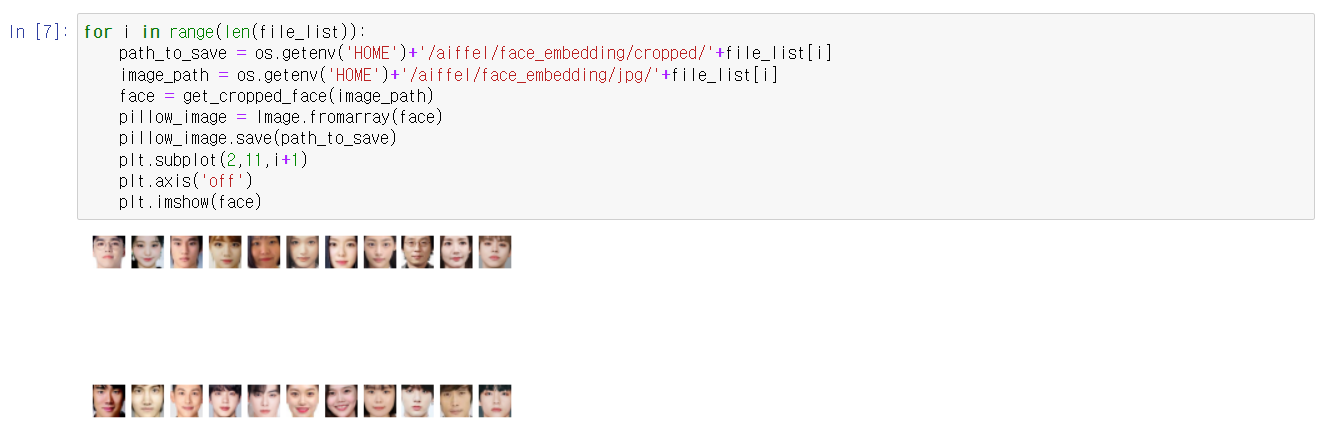  

    이 코드를 짜는 게 어려웠다. 이 코드 바로 위에 있는 힌트를 이용해서 for문으로 하나씩 불러와서 저장하는 방식으로 해결했다.  
#### 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점  
    - img.save(파일명) 또는 img.save(파일명, 확장자명)으로 저장할 수 있다.  
    - 한글 파일을 업로드하는 데 오류가 나서 영어로 하는 게 좋다.  
    - 영어로 하더라도 파일을 하나하나 올리게 되면 시간이 오래 걸리기 때문에 클라우드 쉘에서 unzip 명령어로 하는 것도 좋은 거 같다.
#### 루브릭 평가 지표를 맞추기 위해 시도한 내용  
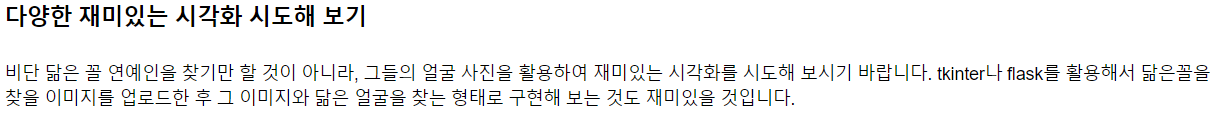

    다양한 재미있는 시각화 시도해보기를 하려고 했으나 tkinter는 주피터노트북에서 돌아가지 않고 flask는 웹페이지를 개발하는 부분을 보고 겁을 먹어서 사이트를 참고해서 읽어보기만 했다.
#### 자기 다짐, 프로젝트를 진행하면서 느낀점  
    리눅스 디렉토리에 대해 더 공부할 필요가 있고 flask를 이용해서 뭔갈 혼자 시작하기에는 용기가 없는 거 같다.